<a href="https://colab.research.google.com/github/LionelLeston/borealbirds-spatialdataworkshop/blob/main/Starting_R_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Starting R in Google Colab

##Lionel Leston

###October 2, 2023

**Learning outcomes from this lesson:**

The student will be able to:

* ***Create*** a new Google Colab worksheet that runs R (or Python) commands by default.

* ***Upload*** data files into Google Colab from his/her computer and/or Google Drive, then ***read*** files into a Colab notebook for R to analyze.

* ***Save*** data files in Google Colab prior to downloading outside of Colab.

* ***Examine file contents*** (*data types*, *distributions*) in Colab, using functions in base R and ***tidyverse*** packages.

* ***Identify*** different parts of R code in Colab: functions, constants, data frames, variables, objects.

* ***Subset data*** (*filtering*, *slicing*) in Colab, using functions in base R and ***tidyverse*** packages.

* ***Manipulate data and create new variables*** in Colab, using functions in base R and ***tidyverse*** packages.

* ***Explore/visualize data prior to and after modeling*** in Colab, using functions in base R and ***tidyverse*** packages.

* ***Explain*** how sharing code and writing reports in Google Colab notebooks enhances reproducibility of research.


##Learning Outcome: Create a new Google Colab worksheet that runs R (or Python) commands by default.

To start a new Colab workbook, go to *File* in the top left, then *New notebook* in *File*'s drop-down menu. Give your new workbook a new name. Since Colab notebooks are Jupyter notebooks hosted by Google Colab, they will have a **.ipynb** extension.

Google Colab runs Python code by default within cells. To start an R kernel, run the following code cell. This approach allows you to run R and Python in the same notebook.  You can also go to *Runtime >>> Change Runtime Type* and under RunTime type change the default kernel to R. For this script, we will load the extension and specify when we are running R in cells, because we will use some Python later on in the script (just a little!). An overview of Google Colab's abilities can be found [here](https://www.datacamp.com/tutorial/tutorial-google-colab-for-data-scientists#) (note the statement about R is out of date!)

In [ ]:
%load_ext rpy2.ipython

Then, use either %R or %%R to execute R cell magic. Use %%R at the start of a cell if you want all subsequent lines in a cell to be executed in R. Use %R if you just want to run a single line of code in R.

In [ ]:
%%R
x <- seq(0, 2*pi, length.out=50)
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


The lines of code we ran returned a variable x, and display it as cell output. The code below is how we could use %R to copy R output into an object in Python.

In [ ]:
x = %R x

Now we can use object "x" either in a Python analysis (the default) or in R when we use either %%R or %R.

You could also go to *Runtime >>> Change Runtime Type* and under RunTime type change the default kernel to R. Then you wouldn't need to begin each code cell with %%R or %R to run R in that code cell. But you would only want to do this *IF* you were not going to use any Python code in a Colab notebook at all, after running code cells in R. If you change a notebook's kernel back to Python after running an R kernel in a notebook, the Python code may not run successfully. For example, if you want to connect Google Drive to your Colab notebook, then read datasets from or export results to Google Drive, or compress a folder full of files to download it using code rather than manually download individual files, you need to run your Colab notebook using Python by default. More on that later!

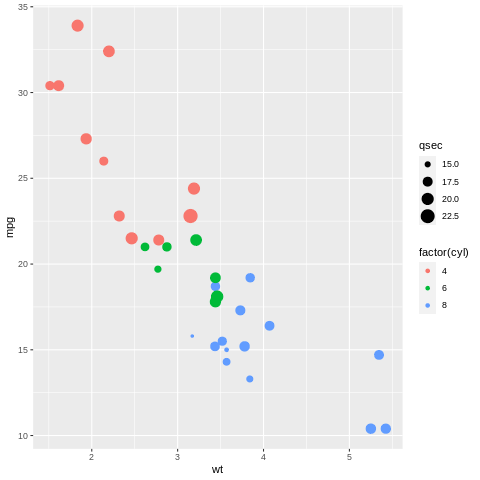

In [ ]:
%%R
#install.packages("ggplot2")
#Uncomment this when you open a session, and install a package in Google Colab for the first time, then comment it out and run the cell
#again to suppress warning texts.
library(ggplot2)
p <- ggplot(mtcars, aes(wt, mpg))
#plot data from a built-in data set that comes with base R
p + geom_point(aes(size = qsec, colour = factor(cyl)))


The above code chunk shows you an example of a scatter plot in R, but the plot is created with a package called ***ggplot2***, which is not included in base R when you download it on your laptop. Similarly in Google Colab, when you call R for the first time within a Colab session, you are only calling in base R at that time. You still need to install then call up any R packages that you would normally install and call up in R or RStudio on your laptop.

***install.packages()*** is a command used to install R packages that extend what base R can do. Once a package is installed (it only needs to be done once on your laptop, unless you're updating a package), the ***library()*** command is used to call that package into R to make use of that package's functions.
***ggplot2*** is a R package containing functions that extend the kinds of plots that base R can do
***mtcars*** is a data frame and an input to a function called ***ggplot()***
***wt*** and ***mpg*** are variables stored in the data frame "mtcars". They are inputs to ***ggplot()***.
***ggplot()*** is a function for creating nice-looking plots.
***p*** is an object (the nice-looking plot) that is produced by the ***ggplot()*** function stored in R.
***geom_point()*** is another function in the ***ggplot2*** package that is used to customize plot ***p***.
***qsec*** and ***cyl*** are variables stored in the data frame "mtcars". They are inputs to ***geom_point()***.

Every green line in the code cell that begins with a hashtag is a comment. Comments are not code so R doesn't run anything beginning with a hashtag. Comments are used to document R scripts so that other people know what each line or group of lines of code does.

I encourage you to add your own comments in your own words to any lines of code to help reinforce what each line of code does.

To learn more about how to use specific packages and functions, you can use a question mark followed by the name of a package or function, at least in R or RStudio.

#Learning Outcome: Upload data files into Google Colab computer and/or Google Drive, then read files into Colab.

One way of reading data into R with Google Colab is to upload individual files manually using the drop-down menu in Colab. Download the Google Colab notebook data sets to which you have been given access, somewhere on your laptop. Then look for the "***Swainsons-Thrush-song-rates.csv***" file.

Click on the “Files” tab in the left-hand panel, then navigate to the **content** subfolder.
Click on the “Upload” button.
Select the file you want to upload and store within the **content** folder.
Then run the following code cell below. Note that the file path must include the subfolder where you have uploaded your data.

In [ ]:
%%R
swth <- read.csv("/content/Swainsons-Thrush-song-rates.csv")

The data from the CSV file is read into a type of R object called a **data frame**, the R equivalent to a single spreadsheet. In a data frame, each row corresponds to a separate observation and each column corresponds to a separate variable. Observations with missing values for a particular variable usually have a value of ***NA*** (i.e., not available), but not always.

The data in the data frame and CSV file come from 1-minute recordings by ***autonomous recording units*** (***ARUs***) at boreal forest sites in northern and southern BC/Alberta, taken every 15 minutes across a 24-hour period on multiple days per site. When they were detected by observers listening to recordings in the lab, Swainson's Thrush (*Catharus ustulatus*) songs were tagged and transcribed in each recording (*variable* ***individual_count***), along with the ***detection time*** (#seconds into the recording) and whether a particular song was thought to be sung by the first individual, or a second or third individual, etc. (*variable* ***individual_order***). These data can be used to test for the effects of time of year and time of day/night on Swainson's Thrush song activity, and whether these effects vary with latitude, since relative length of day and night at a given time of year varies with latitude.

List all the variable names in the dataframe **swth**.

In [ ]:
%%R
names(swth)

 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              


You could list the entire contents of the data frame ***swth*** in R or Google Colab simply by calling the name of the data frame by itself in a command, but this isn't recommended for large files. Instead, use the ***head*** command to print the first 6 observations for each variable. 6 is a default: you can add "n = whatever number you input" to print a larger number of observations.

In [ ]:
%%R
head(swth)

  organization project_id location location_id location_buffer_m longitude
1           BU        657  BG-8-11       35076                NA -122.1562
2           BU        657  BG-8-11       35076                NA -122.1562
3           BU        657  BG-8-11       35076                NA -122.1562
4           BU        657  BG-8-11       35076                NA -122.1562
5           BU        657  BG-8-11       35076                NA -122.1562
6           BU        657  BG-8-11       35076                NA -122.1562
  latitude     equipment_make recording_id recording_date_time task_id
1 59.41171 Wildlife Acoustics       204078 2016-06-10 15:00:00  173237
2 59.41171 Wildlife Acoustics       203990 2016-06-10 22:23:00  173145
3 59.41171 Wildlife Acoustics       203589 2016-06-10 23:23:00  172744
4 59.41171 Wildlife Acoustics       204027 2016-06-11 02:00:00  173182
5 59.41171 Wildlife Acoustics       203732 2016-06-11 02:23:00  172887
6 59.41171 Wildlife Acoustics       203903 2016-0

In [ ]:
%%R
head(swth, n=20)#or n=another number

   organization project_id location location_id location_buffer_m longitude
1            BU        657  BG-8-11       35076                NA -122.1562
2            BU        657  BG-8-11       35076                NA -122.1562
3            BU        657  BG-8-11       35076                NA -122.1562
4            BU        657  BG-8-11       35076                NA -122.1562
5            BU        657  BG-8-11       35076                NA -122.1562
6            BU        657  BG-8-11       35076                NA -122.1562
7            BU        657  BG-8-11       35076                NA -122.1562
8            BU        657  BG-8-11       35076                NA -122.1562
9            BU        657  BG-8-11       35076                NA -122.1562
10           BU        657  BG-8-11       35076                NA -122.1562
11           BU        657  BG-8-11       35076                NA -122.1562
12           BU        657  BG-8-11       35076                NA -122.1562
13          

You can print just the observations for specific variables by specifying the data frame name, followed by a dollar sign as separator, then the variable name. Note the observations with missing values in the variable ***detection_time***.

In [ ]:
%%R
head(swth$detection_time, n=100)

  [1]  0.03    NA    NA    NA    NA    NA    NA  2.13  0.41  0.10  0.05    NA
 [13]    NA  1.83    NA    NA  0.16 19.88 34.49  7.60 47.75 12.15 52.56 38.59
 [25] 24.44    NA    NA    NA  5.61 13.90 19.65  9.19 38.11 42.50 55.70 31.88
 [37]  4.15 24.05 18.50 36.70 11.76 53.08 16.56 35.00 25.25  7.51  1.54 49.03
 [49]  2.63  0.10 33.13 26.39    NA    NA  0.46    NA 50.43 40.13    NA    NA
 [61]  0.11    NA    NA  0.03    NA    NA    NA  2.31  0.05  0.58    NA  0.09
 [73]    NA    NA  0.15    NA 51.08 48.06 23.66 53.60  0.41  4.90 14.90 19.91
 [85] 26.41 32.41 44.24 37.10 29.18 30.68 58.75 42.30 49.35 10.30 46.50 28.38
 [97] 17.00 55.31  0.93 43.33


You can identify specific rows and columns in the data frame by their number(s). Unlike Python, row numbers and column numbers in a R data frame start with number 1 rather than 0.

In [ ]:
%%R
swth[1:10,]$detection_time  #gets the first 10 observations (rows) of the column detection_time

 [1] 0.03   NA   NA   NA   NA   NA   NA 2.13 0.41 0.10


In [ ]:
%%R
head(swth[,1:3])  #prints the first 6 observations (default) but only the values for the first 3 columns

  organization project_id location
1           BU        657  BG-8-11
2           BU        657  BG-8-11
3           BU        657  BG-8-11
4           BU        657  BG-8-11
5           BU        657  BG-8-11
6           BU        657  BG-8-11


In [ ]:
%%R
swth[1:10,1:3]  #prints first 10 rows and just the first 3 columns

   organization project_id location
1            BU        657  BG-8-11
2            BU        657  BG-8-11
3            BU        657  BG-8-11
4            BU        657  BG-8-11
5            BU        657  BG-8-11
6            BU        657  BG-8-11
7            BU        657  BG-8-11
8            BU        657  BG-8-11
9            BU        657  BG-8-11
10           BU        657  BG-8-11


Lists the type of data and possible values of each variable in **swth**.

In [ ]:
%%R
str(swth)

'data.frame':	5820 obs. of  30 variables:
 $ organization               : chr  "BU" "BU" "BU" "BU" ...
 $ project_id                 : int  657 657 657 657 657 657 657 657 657 657 ...
 $ location                   : chr  "BG-8-11" "BG-8-11" "BG-8-11" "BG-8-11" ...
 $ location_id                : int  35076 35076 35076 35076 35076 35076 35076 35076 35076 35076 ...
 $ location_buffer_m          : logi  NA NA NA NA NA NA ...
 $ longitude                  : num  -122 -122 -122 -122 -122 ...
 $ latitude                   : num  59.4 59.4 59.4 59.4 59.4 ...
 $ equipment_make             : chr  "Wildlife Acoustics" "Wildlife Acoustics" "Wildlife Acoustics" "Wildlife Acoustics" ...
 $ recording_id               : int  204078 203990 203589 204027 203732 203903 203726 203806 203988 203588 ...
 $ recording_date_time        : chr  "2016-06-10 15:00:00" "2016-06-10 22:23:00" "2016-06-10 23:23:00" "2016-06-11 02:00:00" ...
 $ task_id                    : int  173237 173145 172744 173182 172887 17305

In [ ]:
%%R
nrow(swth) #number of observations (rows) in data frame

[1] 5820


In [ ]:
%%R
ncol(swth) #number of variables (columns) in data frame

[1] 30


You can also read files into Google Colab from where they are stored on Google Drive (https://saturncloud.io/blog/how-to-import-files-from-google-drive-to-colab/). The first step is to mount your Google Drive account to your Colab notebook. To do this, you would copy and run cells at the link in Python (so those cells do not begin with %%R). However, the Python commands may not work and may give you a runtime error if your Google Drive's root folder contains too many files: so if you do think you'll want to load files into Colab from Google Drive, *it's important to keep your Google folder nice and tidy!* After that you would use Python to read in a file from Google Drive as a Python object (e.g., a Python data frame). You could then visit https://medium.com/grabngoinfo/how-to-use-r-with-google-colab-notebook-610c3a2f0eab to learn how to convert Python data frames to R data frames.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
a<-read.csv("/content/drive/Shareddrives/BayneLab_wildlife_modelling_class/course_materials/colab_notebook_datasets/Swainsons-Thrush-song-rates.csv")
print(head(a))#prints all variables from first 6 observations in dataset
a2<-head(a)#save (first 6 observations only) as a different dataset, then write back to Google Drive folder
write.csv(a2,"/content/drive/Shareddrives/BayneLab_wildlife_modelling_class/student_assignments/test-yourinitialshere.csv")
#write back to an existing Google Drive output folder, under a different file name

  organization project_id location location_id location_buffer_m longitude
1           BU        657  BG-8-11       35076                NA -122.1562
2           BU        657  BG-8-11       35076                NA -122.1562
3           BU        657  BG-8-11       35076                NA -122.1562
4           BU        657  BG-8-11       35076                NA -122.1562
5           BU        657  BG-8-11       35076                NA -122.1562
6           BU        657  BG-8-11       35076                NA -122.1562
  latitude     equipment_make recording_id recording_date_time task_id
1 59.41171 Wildlife Acoustics       204078 2016-06-10 15:00:00  173237
2 59.41171 Wildlife Acoustics       203990 2016-06-10 22:23:00  173145
3 59.41171 Wildlife Acoustics       203589 2016-06-10 23:23:00  172744
4 59.41171 Wildlife Acoustics       204027 2016-06-11 02:00:00  173182
5 59.41171 Wildlife Acoustics       203732 2016-06-11 02:23:00  172887
6 59.41171 Wildlife Acoustics       203903 2016-0

If data sets are small enough to store on a *public* GitHub repository (i.e., less than 25 MB), you could load data sets from a *public* GitHub repository.

In [ ]:
import pandas as pd
url = 'copied_raw_GH_link'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
x = %R df1
# Converts Pandas Dataframe to an R Dataframe


Error in file(file, "rt") : cannot open the connection


##Learning Outcome: Save data files, output, notebooks in Google Colab.

Saving Your R Notebook in Google Colaboratory, you can click on “File” in the top left corner and select “Save” or use the keyboard shortcut “Ctrl+S”. Colab will save your notebook to your Google Drive account, where you can access it later. To save a data file that you have created or modified, you can, e.g.,

In [ ]:
%%R
swth2<-swth
write.csv(swth2, file="/content/ABMI_SWTH_savedExample.csv")

If you refresh the Table of Contents and look within "Files", you will see that we saved a *csv* file with the ***write.csv()*** command. Another way you can save data is as a file with an *RData* extension with the ***save()*** command. *RData* files can store data more compactly than a *.csv file can, and can store multiple objects (files, data frames, images, constants, vectors).

In [ ]:
%%R
save(swth, swth2, file="/content/SWTH.anotherfilename.RData")

List the data frames and other objects currently stored in open R workspace.

In [ ]:
%%R
ls()

[1] "a"     "a2"    "swth"  "swth2" "x"    


Remove objects from the workspace. This may be necessary once you have lots of larger files in memory that you are no longer using, to free up space.

In [ ]:
%%R
rm(data,swth,swth2,x,p)

Confirm that those objects have been removed.

In [ ]:
%%R
ls()

[1] "a"  "a2"


Read data back into R. This time we'll use the ***load()*** command to load the contents of the *RData* file we saved.

In [ ]:
%%R
load("/content/SWTH.anotherfilename.RData")
ls()

[1] "a"     "a2"    "swth"  "swth2"


Get working directory where the data are being stored in Google Colab. The result is a file path name in quotation marks. Unlike R, the working directory in Colab doesn't end in a back slash. Relative file paths to input and output files, that is, *relative* to the working directory, are used to read in inputs and save outputs.

In [ ]:
%%R
getwd()

[1] "/content"


#Learning Outcome: Examine file contents in Colab, using commands in base R.

Take another look at the variables in the data frame ***rugr***, along with some summary statistics for each variable.

In [ ]:
%%R
str(swth)


summary(swth)

'data.frame':	5820 obs. of  30 variables:
 $ organization               : chr  "BU" "BU" "BU" "BU" ...
 $ project_id                 : int  657 657 657 657 657 657 657 657 657 657 ...
 $ location                   : chr  "BG-8-11" "BG-8-11" "BG-8-11" "BG-8-11" ...
 $ location_id                : int  35076 35076 35076 35076 35076 35076 35076 35076 35076 35076 ...
 $ location_buffer_m          : logi  NA NA NA NA NA NA ...
 $ longitude                  : num  -122 -122 -122 -122 -122 ...
 $ latitude                   : num  59.4 59.4 59.4 59.4 59.4 ...
 $ equipment_make             : chr  "Wildlife Acoustics" "Wildlife Acoustics" "Wildlife Acoustics" "Wildlife Acoustics" ...
 $ recording_id               : int  204078 203990 203589 204027 203732 203903 203726 203806 203988 203588 ...
 $ recording_date_time        : chr  "2016-06-10 15:00:00" "2016-06-10 22:23:00" "2016-06-10 23:23:00" "2016-06-11 02:00:00" ...
 $ task_id                    : int  173237 173145 172744 173182 172887 17305

You can look at the data within individual *variables* in the *data frame* by calling a variable's name within R. But what happens if you try to look at individual variables in the data frame, when you just call the variable name without the name of the data frame where the variable is stored?

In [ ]:
%%R
longitude

  object 'longitude' not found







Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'longitude' not found


When calling variables that are stored within a data frame, you *almost always* have to include the name of the data frame, then a dollar sign separator, *then* the variable name within the data frame.

In [ ]:
%%R
head(swth$longitude)#just the first few observations, to cut down space.

[1] -122.1562 -122.1562 -122.1562 -122.1562 -122.1562 -122.1562


To make it easier to write variable names without including the data frame name and dollar sign, you can "attach" a data frame. Then you can get away with writing just the variable name.

In [ ]:
%%R
attach(swth)
head(longitude)#just the first few observations, to cut down printed output.

[1] -122.1562 -122.1562 -122.1562 -122.1562 -122.1562 -122.1562


Attaching a data frame is generally not recommended once you have multiple data frames in the same workspace, in case the same variable name is used in multiple data frames. That's not an uncommon situation in R: you might use a common variable column in two data frames to merge those data frames based on the values in that column (e.g., site name in a bird survey data frame and a vegetation data frame). To "detach" a data frame and return to the
dataframeName$variableName syntax:

In [ ]:
%%R
detach(swth)
head(swth$longitude)

[1] -122.1562 -122.1562 -122.1562 -122.1562 -122.1562 -122.1562


#Learning Outcome: Identify different parts of a script: data frame, variables, constants, basic R functions, operations, objects, comments

There are two data frames currently active in this R workspace. What are their names? What command can you use to find the contents in this Colab R workspace?

Give 2 examples of variable names that are for real numbers stored in either data frame.

Give 1 example of a variable name that is for TRUE/FALSE data stored in either data frame.

Give 3 examples of variable names that are for integers stored in either data frame.

Give 3 examples of variable names that are for character strings stored in either data frame.


In [ ]:
%%R
mean(swth$detection_time, na.rm=TRUE)
#na.rm=TRUE means that mean value will be calculated just on non-missing observations

[1] 21.87334


The above code shows how to calculate the mean value in the data frame "swth" for the variable "detection time". Try removing the ", na.rm=TRUE" from the code and see what you get. Why do you get the result you get? ***Hint: summary(swth$detection_time)***.

When you calculated the mean value above, neither R nor Google Drive stores the result. You need to save the result of a function in an ***object***.

In [ ]:
%%R
detectionMean<-mean(swth$detection_time, na.rm=TRUE)
detectionMean

[1] 21.87334


Now the mean value is saved in the object detectionMean and this value can be called up whenever you need it, without rerunning *mean(swth$detection_time, na.rm=TRUE)* over and over again. There are lots of basic functions in R like ***sum***, ***median***, ***min***, ***max***, ***sd***, ***var***, ***length***, ***stem***, and ***hist***. Try replacing the function ***mean*** in the code cell below with one of these other functions, and save the result in an object with an appropriate name. Do you need to include *, na.rm=TRUE* for all of these functions?

In [ ]:
%%R
objectNameHere<-mean(swth$detection_time, na.rm=TRUE)
objectNameHere

[1] 21.87334


##Learning Outcome: Subset data (*filtering*, *slicing*) in Colab, using functions in base R and ***tidyverse*** packages.

Analyses are usually broken down into multiple steps, and in many analyses, data may be transformed more than once during processing. You'll find in R that there is more than one way of doing the same analysis.

In base R, due to the way it was developed, each analysis step or transformation of data must be saved as a separate object.

But code can be made cleaner with fewer lines and possibly more efficient if fewer objects must be saved, through the use of ***pipes*** and naming conventions.

Pipes (%>%) are used to tell R to perform operations on intermediate objects.

We'll learn how to subset data using methods in basic R, then learn how to use pipes in ***tidyverse*** packages.

In base R, suppose we want to create a smaller data frame with just the observations from a single site.

In [ ]:
%%R
print(levels(as.factor(swth$location)))
#converts character string values to a factor variable, then prints unique values of the factor variable
swthBigGrids<-swth[swth$location %in% c("BG-8-11","BG-8-21"),]
print(nrow(swthBigGrids)) #prints the number of observations in the new, filtered data frame.
#There are fewer observations than in the original data frame.
print(ncol(swthBigGrids)) #prints the number of variables in the new, filtered data frame.
#There are the same number of variables as in the original data frame

[1] "BG-8-11"     "BG-8-21"     "NWTI-3-7-NW" "RIVR-6-2"   
[1] 1785
[1] 30


To use tidyverse functions, we need to import a package called ***tidyverse***. Alternatively, we could import ***dplyr*** and ***tidyr***. Once imported, we'll use the ***filter*** function.

In [ ]:
%%R
#install.packages("tidyverse")  #alternatively, dplyr and tidyr
library(tidyverse)  #alternatively, dplyr and tidyr
swthBigGridsTidy<-swth%>%filter(location %in% c("BG-8-11","BG-8-21"),)
print(nrow(swthBigGridsTidy)) #same number of observations in the new, filtered data frame
#as in the filtered data frame created in base R.
print(ncol(swthBigGridsTidy)) #same number of columns in the new, filtered data frame
#as in the filtered data frame created in base R.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[1] 1785
[1] 30


Let's make a data frame where some of the columns in ***swth*** have been dropped. In base R, there are a couple ways to do this.

In [ ]:
%%R
swthFewerVar<-swth  #creates a new data frame from swth.
names(swthFewerVar)  #same variables as original data frame swth.
swthFewerVar$species_scientific_name<-NULL  #remove individual variable from data frame
swthFewerVar$tag_rating<-NULL  #remove individual variable from data frame
swthFewerVar$task_method<-NULL  #remove individual variable from data frame
names(swthFewerVar) #27 variables left: three variables dropped

 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "species_code"               
[15] "species_common_name"         "individual_order"           
[17] "tag_id"                      "individual_count"           
[19] "vocalization"                "detection_time"             
[21] "tag_duration"                "rms_peak_dbfs"              
[23] "tag_is_verified"             "observer"                   
[25] "observer_user_id"            "species_individual_comments"
[27] "task_comments"              


In [ ]:
%%R
names(swth)  #30 variables
swthFewerVar2<-swth[,1:10]  #selects first 10 columns
#requires that you know what column number your variable is.
names(swthFewerVar2) #10 variables left: 20 variables dropped

 [1] "organization"        "project_id"          "location"           
 [4] "location_id"         "location_buffer_m"   "longitude"          
 [7] "latitude"            "equipment_make"      "recording_id"       
[10] "recording_date_time"


In [ ]:
%%R
names(swth)  #30 variables
swthFewerVar3<-swth[,-c(16:17)]  #selects all but columns 16 and 17
#those columns refer to species_common_name and species_scientific_name
#requires that you know what column number your variable is.
names(swthFewerVar3) #28 variables left: species_common_name and species_scientific_name dropped

 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "individual_order"           
[17] "tag_id"                      "individual_count"           
[19] "vocalization"                "detection_time"             
[21] "tag_duration"                "rms_peak_dbfs"              
[23] "tag_is_verified"             "tag_rating"                 
[25] "observer"                    "observer_user_id"           
[27] "species_individual_comments" "task_comments"              


And here's how you filter columns in ***tidyverse*** with the ***select*** command:

In [ ]:
%%R
names(swth)  #30 variables
swthFewerVar4<-swth%>%select(organization,
                             project_id,
                             location,
                             longitude,
                             latitude,
                             recording_id,
                             recording_date_time,
                             species_code,
                             individual_order,
                             individual_count,
                             detection_time)
#easier to select specific columns by name rather than number in different parts of the data frame
names(swthFewerVar4)

 [1] "organization"        "project_id"          "location"           
 [4] "longitude"           "latitude"            "recording_id"       
 [7] "recording_date_time" "species_code"        "individual_order"   
[10] "individual_count"    "detection_time"     


What if you want to filter both rows and columns? In base R:

In [ ]:
%%R
swthBigGridsBasic<-swth[swth$location %in% c("BG-8-11","BG-8-21"),]
#specific location values; all columns still selected
swthBigGridsBasic2<-swthBigGridsBasic[,c("organization","project_id")]
head(swthBigGridsBasic2)


  organization project_id
1           BU        657
2           BU        657
3           BU        657
4           BU        657
5           BU        657
6           BU        657


In [ ]:
#Or you could do this:
%%R
swthBigGridsBasicOtherWay<-swth[swth$location %in% c("BG-8-11","BG-8-21"),c("organization","project_id")]
head(swthBigGridsBasicOtherWay)

  organization project_id
1           BU        657
2           BU        657
3           BU        657
4           BU        657
5           BU        657
6           BU        657


Using the ***filter*** and ***select*** commands with pipes:

In [ ]:
%%R
swthBigGridsTidy<-swth%>%
filter(location %in% c("BG-8-11","BG-8-21"))%>%
select(organization,
       project_id,
       latitude,
       longitude,
       individual_count,
       individual_order,
       recording_id,
       recording_date_time)
head(swthBigGridsTidy)

  organization project_id latitude longitude individual_count individual_order
1           BU        657 59.41171 -122.1562                1                1
2           BU        657 59.41171 -122.1562               NA               NA
3           BU        657 59.41171 -122.1562               NA               NA
4           BU        657 59.41171 -122.1562               NA               NA
5           BU        657 59.41171 -122.1562               NA               NA
6           BU        657 59.41171 -122.1562               NA               NA
  recording_id recording_date_time
1       204078 2016-06-10 15:00:00
2       203990 2016-06-10 22:23:00
3       203589 2016-06-10 23:23:00
4       204027 2016-06-11 02:00:00
5       203732 2016-06-11 02:23:00
6       203903 2016-06-11 03:23:00


You can use Boolean operations (==, !, >, <) in filtering in base R and ***tidyverse***.

In [ ]:
%%R
NoMissingValues_Basic<-swth[!is.na(swth$detection_time),]
print(nrow(NoMissingValues_Basic)) #fewer observations than original data frame
print(names(NoMissingValues_Basic)) #same 30 columns as original data frame
print(head(NoMissingValues_Basic$detection_time, n=100))
#first 100 values of detection_time; none missing

[1] 3522
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1]  0.03  2.1

In [ ]:
%%R
NoMissingValues_Tidy<-swth%>%
filter(!is.na(detection_time))
print(nrow(NoMissingValues_Tidy)) #fewer observations than original data frame
print(names(NoMissingValues_Tidy)) #same 30 columns as original data frame
print(head(NoMissingValues_Tidy$detection_time, n=100))
#first 100 values of detection_time; none missing

[1] 3522
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1]  0.03  2.1

In [ ]:
%%R
EarlyDetections_Basic<-swth[swth$detection_time<30,]
EarlyDetections_Basic2<-EarlyDetections_Basic[!is.na(EarlyDetections_Basic$detection_time),]
#only detections from first 30 seconds of each recording
print(nrow(EarlyDetections_Basic2)) #fewer observations than original data frame
print(names(EarlyDetections_Basic2)) #same 30 columns as original data frame
print(head(EarlyDetections_Basic2$detection_time, n=100))
#first 100 values of detection_time; none missing; all values < 30

[1] 2259
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1]  0.03  2.1

In [ ]:
%%R
EarlyDetections_Tidy<-swth%>%
filter(!is.na(detection_time))%>%
filter(detection_time<30)
#only detections from first 30 seconds of each recording
print(nrow(EarlyDetections_Tidy)) #fewer observations than original data frame
print(names(EarlyDetections_Tidy)) #same 30 columns as original data frame
print(head(EarlyDetections_Tidy$detection_time, n=100))
#first 100 values of detection_time; none missing; all values < 30

[1] 2259
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1]  0.03  2.1

You should be starting to notice that using ***tidyverse*** functions, you can run multiple analysis steps on a single line, while it might require or be easier to write a separate line for each analysis step in base R.

You may also be figuring out that when including **!** in a Boolean expression when filtering observations, the exclamation mark means the negative of the Boolean expression, e.g., ***!is.na()*** means *is **NOT** missing*.

One more example of using Boolean expressions when filtering in base R or ***tidyverse***: the double equal sign **==**.

In [ ]:
%%R
FirstBirdDetections_Basic<-swth[swth$species_code=="SWTH",]
#select only detections of Swainson's Thrush, not other species.
FirstBirdDetections_Basic2<-FirstBirdDetections_Basic[FirstBirdDetections_Basic$individual_order==1,]
#value assigned to the first individual of each transcribed species in a recording
print(nrow(FirstBirdDetections_Basic2)) #fewer observations than original data frame
print(names(FirstBirdDetections_Basic2)) #same 30 columns as original data frame
print(head(FirstBirdDetections_Basic2$detection_time, n=100))
#first 100 values of detection_time for the first Swainson's Thrush in any recording; none missing

[1] 1852
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1] 19.88 34.4

In [ ]:
%%R
FirstBirdDetections_Tidy<-swth%>%
filter(species_code=="SWTH")%>%
filter(individual_order==1)
print(nrow(FirstBirdDetections_Tidy)) #fewer observations than original data frame
print(names(FirstBirdDetections_Tidy)) #same 30 columns as original data frame
print(head(FirstBirdDetections_Tidy$detection_time, n=100))
#first 100 values of detection_time for the first Swainson's Thrush in any recording; none missing

[1] 1852
 [1] "organization"                "project_id"                 
 [3] "location"                    "location_id"                
 [5] "location_buffer_m"           "longitude"                  
 [7] "latitude"                    "equipment_make"             
 [9] "recording_id"                "recording_date_time"        
[11] "task_id"                     "aru_task_status"            
[13] "task_duration"               "task_method"                
[15] "species_code"                "species_common_name"        
[17] "species_scientific_name"     "individual_order"           
[19] "tag_id"                      "individual_count"           
[21] "vocalization"                "detection_time"             
[23] "tag_duration"                "rms_peak_dbfs"              
[25] "tag_is_verified"             "tag_rating"                 
[27] "observer"                    "observer_user_id"           
[29] "species_individual_comments" "task_comments"              
  [1] 19.88 34.4

By now, you may have noticed another potential advantage of using ***tidyverse*** functions: not only fewer lines of code but less text required for the code you are writing.

##Learning Outcome: Manipulate data and create new variables in Colab, using functions in base R and ***tidyverse*** packages.

###Sorting data

In [ ]:
%%R
Ord1 <- order(swth$detection_time)
#sorts dataframe "swth" by values in the variable "detection_time"
#"detection_time" = number of seconds into each recording when a Swainson's Thrush
#detection is made. For recordings without Swainson's Thrush, value = NA.
head(swth[Ord1,]$detection_time, n=200)
#prints (but does not save) dataframe "swth" in order of values in "detection_time"

  [1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [16] 0.00 0.00 0.00 0.00 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [31] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [46] 0.01 0.01 0.01 0.01 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [61] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [76] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [91] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
[106] 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[121] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[136] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[151] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[166] 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
[181] 0.05 0.05 0.05 0.05 0.

We can see that the order of values according to detection time isn't currently saved in the data frame if we don't include the ordering as part of the command. If the ordering is included, NA values appear at the end of the series.

In [ ]:
%%R
head(swth$detection_time, n=200)

  [1]  0.03    NA    NA    NA    NA    NA    NA  2.13  0.41  0.10  0.05    NA
 [13]    NA  1.83    NA    NA  0.16 19.88 34.49  7.60 47.75 12.15 52.56 38.59
 [25] 24.44    NA    NA    NA  5.61 13.90 19.65  9.19 38.11 42.50 55.70 31.88
 [37]  4.15 24.05 18.50 36.70 11.76 53.08 16.56 35.00 25.25  7.51  1.54 49.03
 [49]  2.63  0.10 33.13 26.39    NA    NA  0.46    NA 50.43 40.13    NA    NA
 [61]  0.11    NA    NA  0.03    NA    NA    NA  2.31  0.05  0.58    NA  0.09
 [73]    NA    NA  0.15    NA 51.08 48.06 23.66 53.60  0.41  4.90 14.90 19.91
 [85] 26.41 32.41 44.24 37.10 29.18 30.68 58.75 42.30 49.35 10.30 46.50 28.38
 [97] 17.00 55.31  0.93 43.33 19.40 28.10    NA  1.73 36.71 28.04 21.91 13.74
[109] 23.79 46.66  6.75 32.88 16.74 48.46 24.90 40.40  8.98 56.90    NA  0.05
[121]    NA 58.74 22.39 11.80  2.54 50.44  0.03    NA    NA  0.08    NA    NA
[133]    NA  0.06    NA  8.00 42.96 22.30 29.83 37.34 52.34 15.70  0.90    NA
[145]  2.09    NA 49.03 56.01 37.74 32.55 11.46 42.95 30.14 26.3

To save observations in a specific order, we have to create a new data frame:

In [ ]:
%%R
swthDetectionTime<-swth[Ord1,]
#saves the data inside "swth", ordered by detection time in a new object "swthDetectionTime"
head(swthDetectionTime$detection_time, n=200)

  [1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [16] 0.00 0.00 0.00 0.00 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [31] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [46] 0.01 0.01 0.01 0.01 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [61] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [76] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [91] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
[106] 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[121] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[136] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[151] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[166] 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
[181] 0.05 0.05 0.05 0.05 0.

Here is another way of ordering a data frame, using the function ***arrange()*** with ***pipes*** (%>%) in the ***tidyverse***.

In [ ]:
%%R
swthTidy<-swth%>%arrange(detection_time)
head(swthTidy$detection_time, n=200)


  [1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [16] 0.00 0.00 0.00 0.00 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [31] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 [46] 0.01 0.01 0.01 0.01 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [61] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [76] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 [91] 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
[106] 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[121] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[136] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[151] 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
[166] 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
[181] 0.05 0.05 0.05 0.05 0.

###Creating New Variables

Create a new variable called *Early* based on whether a detection of a song occurred in the first 30 seconds of the recording. If a song was detected after the first 30 seconds or no song was detected, *Early* equals 0; otherwise, *Early* equals 1.

In [ ]:
%%R
swth$Early_Basic<-ifelse(swth$detection_time<30,1,0)
print(head(swth$Early_Basic, n=200))
print("NA values still present")
swth$Early_BasicNoNA<-ifelse(is.na(swth$detection_time),0,
                             ifelse(swth$detection_time>30,0,1))
print(head(swth$Early_BasicNoNA, n=200))
print("NA values set to zero")

  [1]  1 NA NA NA NA NA NA  1  1  1  1 NA NA  1 NA NA  1  1  0  1  0  1  0  0  1
 [26] NA NA NA  1  1  1  1  0  0  0  0  1  1  1  0  1  0  1  0  1  1  1  0  1  1
 [51]  0  1 NA NA  1 NA  0  0 NA NA  1 NA NA  1 NA NA NA  1  1  1 NA  1 NA NA  1
 [76] NA  0  0  1  0  1  1  1  1  1  0  0  0  1  0  0  0  0  1  0  1  1  0  1  0
[101]  1  1 NA  1  0  1  1  1  1  0  1  0  1  0  1  0  1  0 NA  1 NA  0  1  1  1
[126]  0  1 NA NA  1 NA NA NA  1 NA  1  0  1  1  0  0  1  1 NA  1 NA  0  0  0  0
[151]  1  0  0  1  1  1  1  1  1  0  0  0  0  0 NA NA  1 NA  1  1  1  1 NA  1 NA
[176] NA  0  0  0  0  0  0  1  1  1  0  0  1  1  1 NA NA NA NA NA  1 NA NA  1 NA
[1] "NA values still present"
  [1] 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 [38] 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 [75] 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1
[112] 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0
[1

In [ ]:
%%R
swth<-swth%>%
mutate(Early_Tidy=case_when(is.na(detection_time) ~ 0,
                            detection_time > 30 ~ 0,
                            detection_time < 30 ~ 1))
print(head(swth$Early_Tidy, n=200))
print("NA values set to zero")

  [1] 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 [38] 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 [75] 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1
[112] 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0
[149] 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
[186] 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0
[1] "NA values set to zero"


###Dealing with Missing Values

The raw Swainson's Thrush data downloaded from WildTrax includes data from recordings that have not yet been transcribed. We'll want to remove those recordings prior to exploring or analyzing the data.

In [ ]:
%%R
swthTrans_basic<-swth[swth$aru_task_status=="Transcribed",]
#alternatively:
swthTrans_tidy<-swth%>%filter(aru_task_status=="Transcribed")

There are 3464 observations and 30 columns or variables in both new data frames. No variables have been removed but the number of observations has gone down. We’ll use the “swthTrans_tidy” data frame for the next steps.

Our observations will be individual recordings. Each observation will have a count for each possible species in the dataset. We start by taking the variable individual_count, which is a character string, and converting it to a number variable. This variable contains an observation each time a species is detected singing within a recording. Currently, the first 100 values of individual_count look like this:

In [ ]:
%%R
print(levels(as.factor(swthTrans_tidy$individual_count)))
print("Possible values in variable individual_count")
print(head(swthTrans_tidy$individual_count, n=200))
#Always double-check that there aren't any missing values!
swthTrans_tidyNA<-swthTrans_tidy%>%filter(is.na(individual_count))
numNA<-nrow(swthTrans_tidyNA)
print(numNA)
print("Number of missing values for the variable individual_count")

[1] "1" "2"
[1] "Possible values in variable individual_count"
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2
[186] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1] 4
[1] "Number of missing values for the variable individual_count"


There are 4 missing values (NA) for transcribed recordings where no birds were detected (species_code=NONE). We should change these NA values to zeros.

In [ ]:
%%R
numNA1<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_count),])
print(paste0("There are ", numNA1, " missing values for variable individual_count."))

swthTrans_tidy$individual_countCorrBasic<-ifelse(is.na(swthTrans_tidy$individual_count),0, swthTrans_tidy$individual_count)
numNA2<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_countCorrBasic),])
print(paste0("There are ", numNA2, " missing values for variable individual_countCorrBasic."))

#Alternatively:
swthTrans_tidy<-swthTrans_tidy%>%
  mutate(individual_countCorrTidy = case_when(individual_count==1 ~ 1,
                                individual_count==2 ~ 2,
                                species_code=="NONE" ~ 0))

numNA3<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_countCorrTidy),])
print(paste0("There are ", numNA3, " missing values for variable individual_countCorrTidy."))


[1] "There are 4 missing values for variable individual_count."
[1] "There are 0 missing values for variable individual_countCorrBasic."
[1] "There are 0 missing values for variable individual_countCorrTidy."


After using the mutate and case_when functions, there are 0 missing values for the variable individual_count when no birds are detected in a particular transcribed recording.

The variable individual_order indicates distinct individuals of a species associated with a particular song detection in a recording and, max(individual_order) will give us the number of distinct individuals of a species thought to be in a recording. Like individual_count, there are 4 missing values for individual_order in recordings where no species were detected:

In [ ]:
%%R
numNA4<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_order),])
print(paste0("There are ", numNA4, " missing values for variable individual_order."))

swthTrans_tidy$individual_orderCorrBasic<-ifelse(is.na(swthTrans_tidy$individual_order),0, swthTrans_tidy$individual_order)
numNA5<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_orderCorrBasic),])
print(paste0("There are ", numNA5, " missing values for variable individual_orderCorrBasic."))

#Alternatively:
swthTrans_tidy<-swthTrans_tidy%>%
  mutate(individual_orderCorrTidy = case_when(individual_order==1 ~ 1,
                                individual_order==2 ~ 2,
                                species_code=="NONE" ~ 0))

numNA6<-nrow(swthTrans_tidy[is.na(swthTrans_tidy$individual_orderCorrTidy),])
print(paste0("There are ", numNA6, " missing values for variable individual_orderCorrTidy."))

[1] "There are 4 missing values for variable individual_order."
[1] "There are 0 missing values for variable individual_orderCorrBasic."
[1] "There are 78 missing values for variable individual_orderCorrTidy."


###Summarizing data

Now that we have counts of individual species and songs, we can try summarizing the data for each recording.

Summarize individual counts of each species at each site in each recording using ***tidyverse*** functions while keeping everything on a single 2-d data frame.

In [ ]:
%%R
songs_per_recording<-swth%>%
filter(aru_task_status=="Transcribed")%>%
group_by(location, recording_date_time, species_code, latitude, longitude)%>%
summarize(songactivity=sum(individual_count))%>%
pivot_wider(names_from="species_code", values_from="songactivity")%>%
mutate(across(where(is.numeric), ~replace(., is.na(.), 0)))%>%
select("location", "recording_date_time", "latitude", "longitude", "SWTH")

print(head(songs_per_recording, n=10))

write.csv(songs_per_recording, file="/content/SWTHsongs_per_recording.csv")
#stores the file you created

indivs_per_recording<-swth%>%
filter(aru_task_status=="Transcribed")%>%
group_by(location, recording_date_time, species_code, latitude, longitude)%>%
summarize(indivs=max(individual_order))%>%
pivot_wider(names_from="species_code", values_from="indivs")%>%
mutate(across(where(is.numeric), ~replace(., is.na(.), 0)))%>%
select("location", "recording_date_time", "latitude", "longitude", "SWTH")

print(head(indivs_per_recording, n=10))

write.csv(indivs_per_recording, file="/content/SWTHindivs_per_recording.csv")

`summarise()` has grouped output by 'location', 'recording_date_time',
'species_code', 'latitude'. You can override using the `.groups` argument.
# A tibble: 10 × 5
# Groups:   location, recording_date_time, latitude [10]
   location recording_date_time latitude longitude  SWTH
   <chr>    <chr>                  <dbl>     <dbl> <dbl>
 1 BG-8-11  2016-06-10 15:00:00     59.4     -122.     0
 2 BG-8-11  2016-06-11 12:00:00     59.4     -122.     0
 3 BG-8-11  2016-06-11 22:24:00     59.4     -122.     0
 4 BG-8-11  2016-06-11 23:24:00     59.4     -122.     0
 5 BG-8-11  2016-06-12 00:00:00     59.4     -122.     0
 6 BG-8-11  2016-06-12 04:22:00     59.4     -122.     0
 7 BG-8-11  2016-06-12 21:25:00     59.4     -122.     0
 8 BG-8-11  2016-06-13 02:00:00     59.4     -122.     8
 9 BG-8-11  2016-06-13 22:26:00     59.4     -122.    24
10 BG-8-11  2016-06-14 02:21:00     59.4     -122.     0
`summarise()` has grouped output by 'location', 'recording_date_time',
'species_code', 'latitu

We use ***%>%group_by()*** to collapse the observations of different song detections to a single observation for each recording at each site at a particular day and time.

The resulting temporary object has a single observation for each distinct combination of values of location, recording_date_time, species_code, latitude, and longitude, and this resulting object is the input for ***%>%summarize()***.

The resulting temporary object produced by ***%>%summarize()*** is a summarized variable, either song rate or number of individuals of a species, and that becomes the input for the next piped function, ***%>%pivot_wider***, which ***reshapes*** the data frame so that summarized observations of separate species in each recording become columns.

When that happens, any species not present in a particular recording will have a missing value for that summarized variable, so the next piped function, ***%>%mutate*** will go through any columns with numeric variables and replace NA values with zeroes. The final pipe, ***%>%select*** drops any variables from the data frame that we no longer require, except for those variables in the parentheses.

Each summarized data frame above is produced by a single line of code and only a single object needs to be saved. The same data frame could be produced in base R but would require at least several lines of code and intermediate objects would need to be saved.

In [ ]:
%%R
swthBasic<-swth
swthBasic$individual_count<-ifelse(is.na(swthBasic$individual_count),0,swthBasic$individual_count)#replace NA values with zeroes in "individual_count"

tapply.spp<-tapply(swthBasic$individual_count, list(swthBasic$location, swthBasic$recording_date_time, swthBasic$species_code, swthBasic$latitude, swthBasic$longitude), sum, na.rm=TRUE)
#results stored in 4-d array: more difficult to work with than a flat data frame
str(tapply.spp)

 num [1:4, 1:3496, 1:7, 1:4, 1:4] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "dimnames")=List of 5
  ..$ : chr [1:4] "BG-8-11" "BG-8-21" "NWTI-3-7-NW" "RIVR-6-2"
  ..$ : chr [1:3496] "2016-04-24 03:56:00" "2016-04-24 07:56:00" "2016-04-25 00:00:00" "2016-04-25 15:00:00" ...
  ..$ : chr [1:7] "AMRO" "ELKK" "HETH" "NONE" ...
  ..$ : chr [1:4] "53.789867" "59.411708" "59.417149" "60.03968"
  ..$ : chr [1:4] "-122.156173" "-122.156055" "-113.081" "-111.408461"


As we can see, it takes multiple lines of code to produce the same summarized data frame using basic R and we haven’t even run all of the equivalent commands yet! The summary output produced by base R’s tapply function is in the form of a multi-dimensional array rather than a flat data frame. The latter is easier to comprehend and work with. Trust me, ***tidyverse*** functions make data manipulation much easier!

Let’s create some time variables for each recording, using the ***lubridate*** package. Song rate may vary with time of year and time of day or night when recordings happen. The code below shows how it is done in base R.

In [ ]:
%%R
#install.packages("lubridate") #Once installed for the first time in Google Colab, comment this out.
library(lubridate)
#In base R, you would do this:
songs_per_recording$Hour<-format(as.POSIXct(songs_per_recording$recording_date_time), format = "%H")
songs_per_recording$Minute<-format(as.POSIXct(songs_per_recording$recording_date_time), format = "%M")
songs_per_recording$timeNumeric<-as.integer(songs_per_recording$Hour)+(as.integer(songs_per_recording$Minute)/60)

songs_per_recording$JulianDay<-yday(songs_per_recording$recording_date_time)
write.csv(songs_per_recording, file="/content/SWTHsongs_per_recording.csv")

indivs_per_recording$Hour<-format(as.POSIXct(indivs_per_recording$recording_date_time), format = "%H")
indivs_per_recording$Minute<-format(as.POSIXct(indivs_per_recording$recording_date_time), format = "%M")
indivs_per_recording$timeNumeric<-as.integer(indivs_per_recording$Hour)+(as.integer(indivs_per_recording$Minute)/60)

indivs_per_recording$JulianDay<-yday(indivs_per_recording$recording_date_time)
write.csv(indivs_per_recording, file="/content/SWTHindivs_per_recording.csv")

In [ ]:
%%R
#Alternatively, use tidyverse functions and do this:
songs_per_recording<-songs_per_recording%>%
  mutate(Hour=format(as.POSIXct(recording_date_time), format = "%H"))%>%
  mutate(Minute=format(as.POSIXct(recording_date_time), format = "%M"))%>%
  mutate(timeNumeric=as.integer(Hour)+as.integer(Minute)/60)%>%
  mutate(JulianDay=yday(recording_date_time))

write.csv(songs_per_recording, file="/content/SWTHsongs_per_recording.csv")

indivs_per_recording<-indivs_per_recording%>%
  mutate(Hour=format(as.POSIXct(recording_date_time), format = "%H"))%>%
  mutate(Minute=format(as.POSIXct(recording_date_time), format = "%M"))%>%
  mutate(timeNumeric=as.integer(Hour)+as.integer(Minute)/60)%>%
  mutate(JulianDay=yday(recording_date_time))

write.csv(indivs_per_recording, file="/content/SWTHindivs_per_recording.csv")

When do you decide to use pipes and tidyverse packages and functions as opposed to base R functions? If we need to manipulate multiple separate objects at the same time, rather than apply a sequence of functions to a single object, then there isn’t much of an advantage to using tidyverse over base R. However, it is good to be consistent in how you code your scripts.

Download the summary data frames that you wrote to CSV files, to your computer outside of Google Colab.

###An aside: the ***data.table*** package

While ***tidyverse*** and ***tidyverse***-compatible packages are used by an enormous community of R practitioners, we should make you aware of another package used in R to manipulate data frames, summarize data, and create new variables. That package is ***data.table***.

There is a [***data.table*** cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/datatable_Cheat_Sheet_R.pdf) that you can look at. A lot of people vouch for ***data.table*** as well as or instead of ***tidyverse***.

##Learning Outcome: Explore data (*distributions*, *potential relationships*) prior to modelling in Colab, using functions in base R and ***tidyverse*** packages.

###Histograms

The hist function in basic R can be used to explore how values of a variable are distributed. Plotting the distribution of values may influence what kinds of model we can use to predict that variable. For example, one of the assumptions underlying our trust in results from a ordinary least-squares regression model is that the model errors (residuals) are normally distributed (*as a symmetrical "bell" curve with 95% of values within ~2 standard deviations of the mean and median value, which coincide*). Prior to modelling, if the distribution of values of the dependent variable looks very different from a normal curve (e.g., [skewed, truncated, leptokurtic, or platykurtic](https://colab.research.google.com/drive/1apACLM5lb3-BQIRu8htg9iTLBSyFLT_Q#scrollTo=3wBUMyBHyJw9)), then it is likely that the errors will be non-normally distributed as well. You may then want to either:

* transform the dependent variables values (e.g., take the square-root or log of those values) to pull in extreme outliers, then run the model with the transformed values as the dependent variable.
* consider models that use a non-normal error distribution.

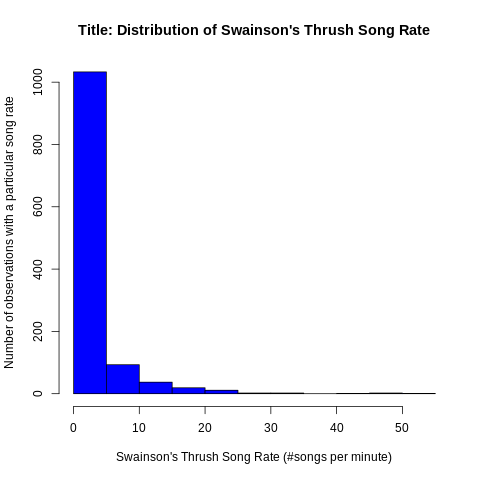

In [ ]:
%%R
hist(songs_per_recording$SWTH,
     xlab="Swainson's Thrush Song Rate (#songs per minute)",
     ylab="Number of observations with a particular song rate",
     main="Title: Distribution of Swainson's Thrush Song Rate",
     col="blue")

In [ ]:
%%R
print(paste0("Mean SWTH song rate per recording: ", round(mean(songs_per_recording$SWTH),2), " (rounded to a maximum of 2 decimal places)"))

[1] "Mean SWTH song rate per recording: 1.94 (rounded to a maximum of 2 decimal places)"


In [ ]:
%%R
print(paste0("Variance in SWTH song rate per recording: ", round(var(songs_per_recording$SWTH),2), " (rounded to a maximum of 2 decimal places)"))

[1] "Variance in SWTH song rate per recording: 26.85 (rounded to a maximum of 2 decimal places)"


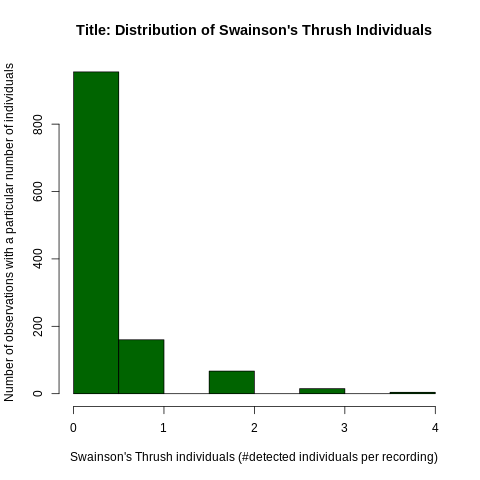

In [ ]:
%%R
hist(indivs_per_recording$SWTH,
     xlab="Swainson's Thrush individuals (#detected individuals per recording)",
     ylab="Number of observations with a particular number of individuals",
     main="Title: Distribution of Swainson's Thrush Individuals",
     col="darkgreen")

The histogram suggests a non-normal distributions of Swainson’s Thrush song activity and number of individuals. So when song rate is a dependent variable in a simpler model like a linear regression model or t-test or ANOVA, we might want to transform its values to better meet the statistical assumptions of that model (e.g., errors are normally distributed). Alternatively, we might want to run a non-parametric model or use a model where we explicitly model song rate with a non-normal distribution. Variance in these response variables is much larger than mean values, suggesting that we should model them with a negative binomial distribution.

Below we see how to create a histogram using plotting functions from a *tidyverse-compatible* package called **ggplot2**. You may have already loaded this package at the start of the Google Colab session. If not, uncomment the ***library(ggplot2)*** command.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


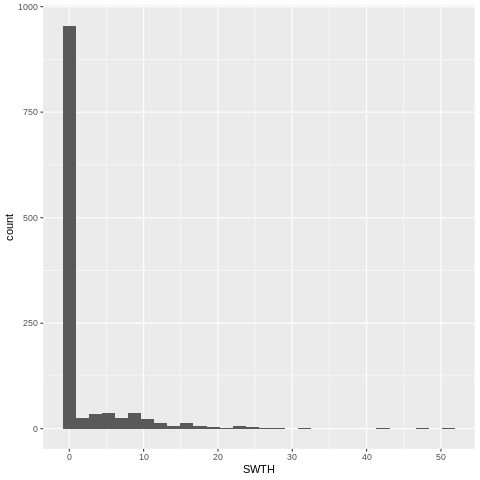

In [ ]:
%%R
#library(ggplot2)
ggplot(songs_per_recording, aes(x=SWTH))+geom_histogram()

Both hist and ggplot histogram objects can be customized in many ways, although ggplot probably allows much greater customization. You can learn more about customizing histograms with ggplot at http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization. You will also see examples of nice-looking histograms later on in [Data & distributions.ipynb](https://colab.research.google.com/drive/1apACLM5lb3-BQIRu8htg9iTLBSyFLT_Q#scrollTo=3wBUMyBHyJw9).


###Bar Plots and Box Plots

Bar plots and box plots are useful for summarizing numeric data for different categories or by dates across time.

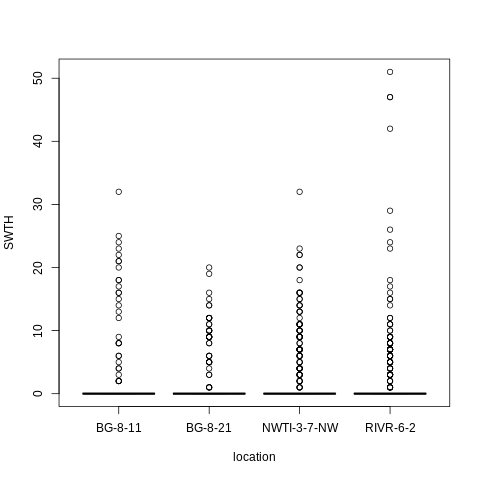

In [ ]:
%%R
swth_summ<-songs_per_recording%>%
  group_by(Hour)%>%
  summarize(SWTH=mean(SWTH))

boxplot(SWTH~location,
        data=songs_per_recording)

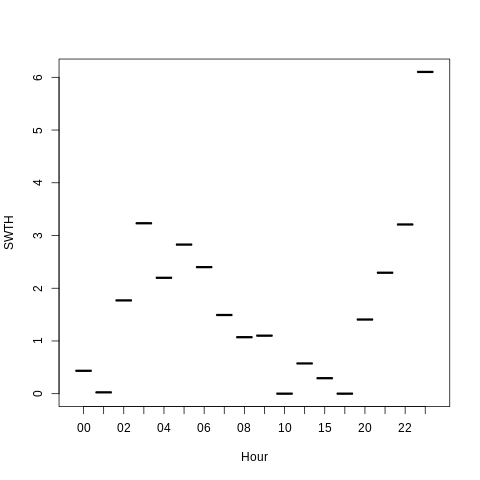

In [ ]:
%%R
boxplot(SWTH~Hour,
        data=swth_summ)

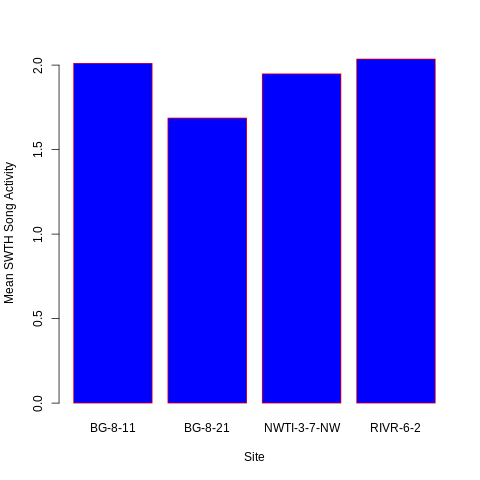

In [ ]:
%%R
swth_summ2<-songs_per_recording%>%
  group_by(location)%>%
  summarize(SWTH=mean(SWTH))

barplot(swth_summ2$SWTH,
  xlab="Site",
  names.arg=levels(as.factor(swth_summ2$location)),
  ylab="Mean SWTH Song Activity",
  border="red",
  col="blue")

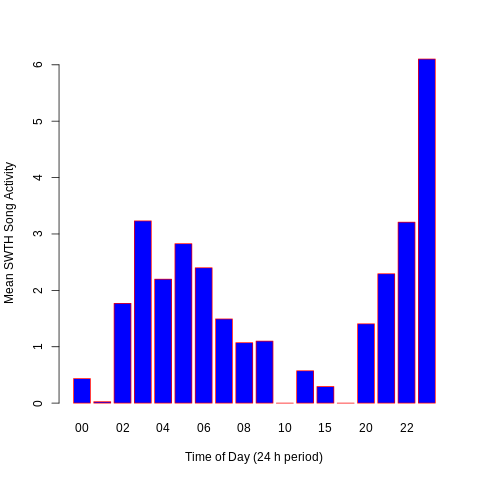

In [ ]:
%%R
barplot(swth_summ$SWTH,
  xlab="Time of Day (24 h period)",
  names.arg=levels(as.factor(swth_summ$Hour)),
  ylab="Mean SWTH Song Activity",
  border="red",
  col="blue")

You can create bar plots and box plots in ggplot as well.

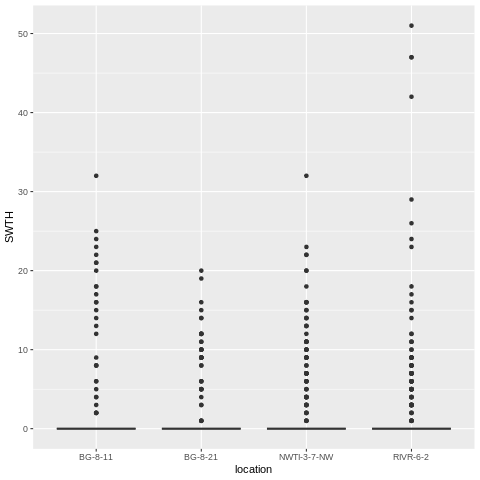

In [ ]:
%%R
ggplot(songs_per_recording, aes(location, SWTH))+geom_boxplot()

Bar plots can be created in ggplot as well, but may be more useful for plotting the number of observations assigned to a particular category, in which case a bar plot behaves like a histogram for categorical variables rather than numeric variables. ***geom_col*** can be used when you want to plot summary values of a variable in different treatments or categories.

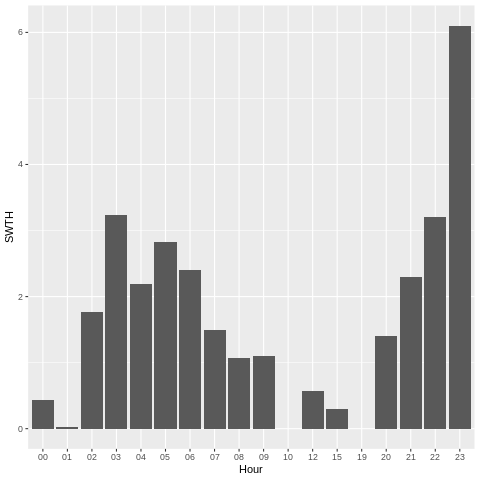

In [ ]:
%%R
ggplot(swth_summ, aes(Hour,SWTH))+geom_col() #for summarizing numeric values per category

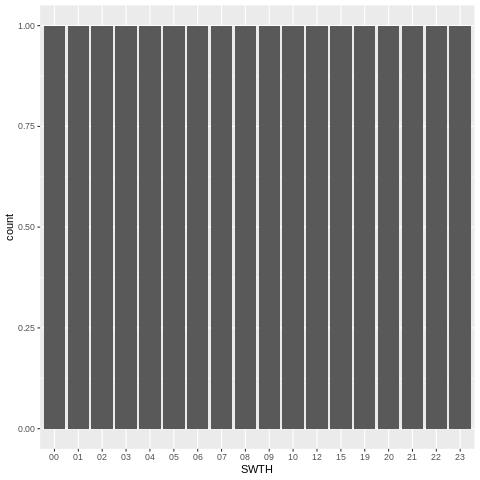

In [ ]:
%%R
ggplot(swth_summ, aes(SWTH))+geom_bar(aes(Hour))#for plotting relative frequency of different categories

Since we made this bar plot from a data frame that summarized song rate in different hours of the day, we have an equal number of observations per hour.

There is code for custimizing box plots with ggplot at https://ggplot2.tidyverse.org/reference/geom_boxplot.html and for customizing bar plots with ggplot at https://ggplot2.tidyverse.org/reference/geom_bar.html.

###Scatter Plots

Scatter plots can be used to show the relationship between two numeric variables. Base R uses the ***plot*** function. Here we have song rate as a function of time of day or night.



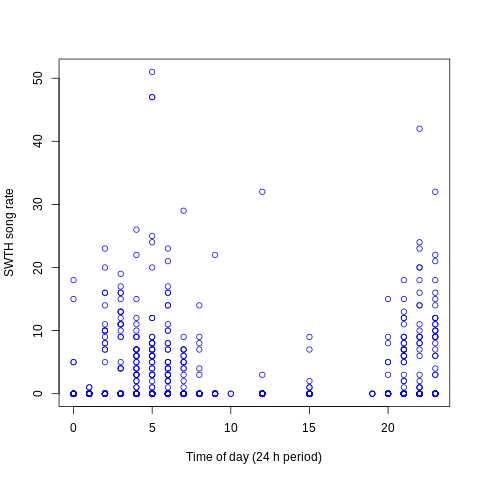

In [ ]:
%%R
plot(songs_per_recording$Hour,
     songs_per_recording$SWTH,
     ylab="SWTH song rate",
     xlab="Time of day (24 h period)",
     col="blue")

And here we have song rate as a function of Julian day (#days since January 1).

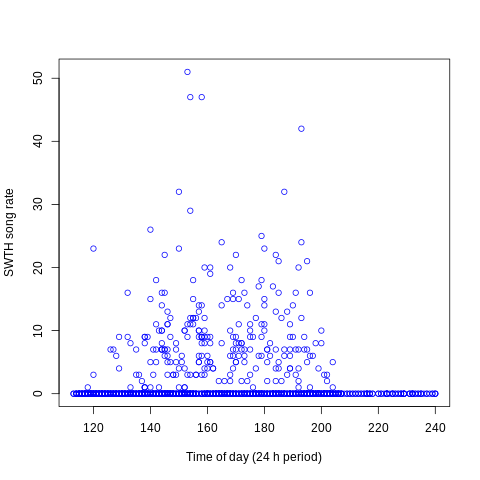

In [ ]:
%%R
plot(songs_per_recording$JulianDay,
     songs_per_recording$SWTH,
     ylab="SWTH song rate",
     xlab="Time of day (24 h period)",
     col="blue")

These plots suggest that singing rate varies nonlinearly with time of day/night and time of year.

The ***ggplot*** function uses ***geom_point()*** to make scatter plots. Here we see how we would plot song rate as a function of time of day or night in ***ggplot***.

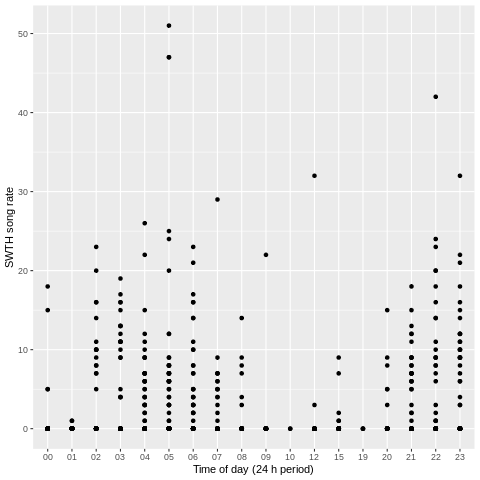

In [ ]:
%%R
ggplot(songs_per_recording, aes(Hour,SWTH))+
  geom_point(aes(Hour,SWTH))+
     ylab("SWTH song rate")+
     xlab("Time of day (24 h period)")

Here we see how we would plot song rate as a function of time of season in ***ggplot***.

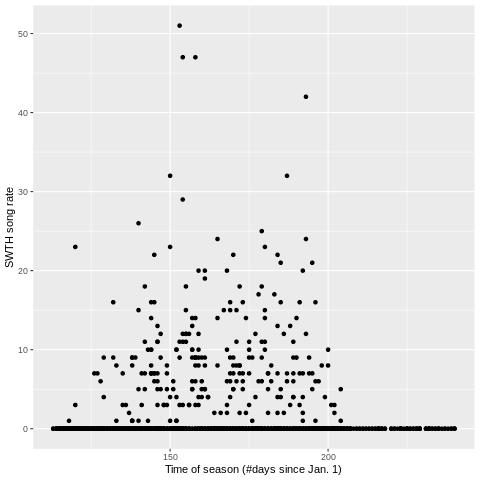

In [ ]:
%%R
ggplot(songs_per_recording, aes(JulianDay,SWTH))+
  geom_point(aes(JulianDay,SWTH))+
     ylab("SWTH song rate")+
     xlab("Time of season (#days since Jan. 1)")

To customize scatter plots using ggplot, you can look at https://ggplot2.tidyverse.org/reference/geom_point.html.

One more thing you will start to see is that there are many websites that show how not only to customize plots in R, but how to use the different packages. There is code on many websites that could be modified to solve a particular analysis problem. You can find answers to many R problems by doing a search on words specific to the type of analysis you are doing and the R packages or functions you are using. Sites like Stack Overflow are repositories for many questions and answers to challenging analysis problems in R. Large Language Models like ChatGPT may also be able to search the web for answers to R problems and generate a potential code script for running your analysis. You will still need to test the code to make sure it works! If you do obtain code from the web that you modify for a particular analysis, make sure you document where you found it and cite or at least acknowledge that source in your reports and manuscripts, especially if it’s not code that can be easily figured out with a basic knowledge of R!

##Learning Outcome: Visualize data (*predictions*, *model diagnostics*) from model results in Colab, using functions in base R and ***tidyverse*** packages.

Data and data relationships are usually plotted both during data exploration prior to modelling (to cut down on unnecessary modelling and data mining), and after models are run. Data are visualized after modelling to:

* ***assess model fit*** (how well the dependent variable is actually predicted by the model) as opposed to relying on model statistics.

* ***assess prediction uncertainty*** (by plotting a prediction interval).

* ***assess to what extent the model's statistical assumptions are being met or violated***, which affects the trustworthiness of results.

* look for outliers, heteroskedasticity of residuals, heterogeneity of variance among categorical predictors.

###Ordinary Least-squares Regression

Data exploration suggested that Swainson’s Thrush song activity varied as a quadratic function of Julian day. Below is code for running a simple linear regression (ordinary least-squares regression) in R with base R’s ***lm*** function.

In [ ]:
%%R
songs_per_recording$JDAY<-(songs_per_recording$JulianDay-mean(songs_per_recording$JulianDay))/sd(songs_per_recording$JulianDay)
#The variable JulianDay is centered prior to calculating the quadratic term so
#that the linear and quadratic terms are not strongly correlated. JDAY
#values will be either negative (for values of Julian day less than the mean) or
#positive (for values of JulianDay greater than the mean), while all quadratic-term
#values will be positive
songs_per_recording$JDAY2<-songs_per_recording$JDAY^2

#Alternatively, create these variables using the mutate function:
meanJDAY<-mean(songs_per_recording$JulianDay)
sdJDAY<-sd(songs_per_recording$JulianDay)
songs_per_recording<-songs_per_recording%>%
  mutate(JDAY=(JulianDay-meanJDAY)/sdJDAY)%>%
  mutate(JDAY2=JDAY^2)

mod<-lm(SWTH~JDAY+JDAY2, data=songs_per_recording)

summary(mod)


Call:
lm(formula = SWTH ~ JDAY + JDAY2, data = songs_per_recording)

Residuals:
   Min     1Q Median     3Q    Max 
-3.032 -2.624 -1.745  0.083 48.256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0098     0.2000  15.051  < 2e-16 ***
JDAY          0.3094     0.1504   2.057   0.0399 *  
JDAY2        -1.0689     0.1368  -7.814  1.2e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.058 on 1198 degrees of freedom
Multiple R-squared:  0.04852,	Adjusted R-squared:  0.04694 
F-statistic: 30.55 on 2 and 1198 DF,  p-value: 1.149e-13



Initial model results include the effect sizes, direction of the effect, and effect size uncertainty and significance for the intercept, linear Julian Day term, and quadratic Julian day term. The intercept coefficient shows the expected song rate when JDAY equals 0 (i.e., the mean value of Julian Day in the data), and therefore, JDAY2 also equals 0. The coefficient for JDAY is significantly positive and the coefficient for JDAY2 is significantly negative, so song rate is predicted to increase with Julian day before decreasing. However, a model with a quadratic function of Julian day only explained a small amount of variance. Let's look at how to get predictions.

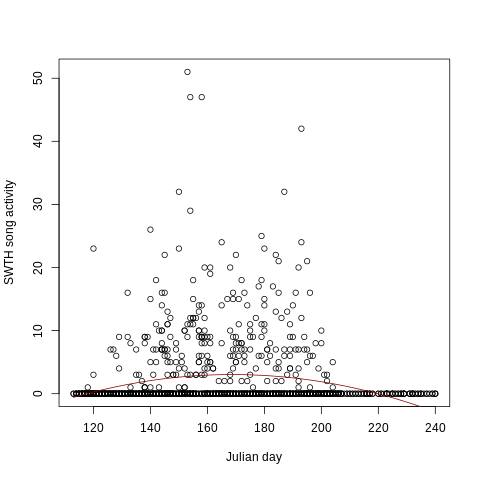

In [ ]:
%%R
#Get predicted values from linear regression
preds<-predict(mod, songs_per_recording, se.fit = FALSE, scale = NULL, df = Inf,
        interval = c("prediction"),
        level = 0.95, type = c("response"))

songs_per_recording.P<-cbind(songs_per_recording,preds)

songs_per_recording.P<-songs_per_recording.P%>%
  arrange(JulianDay)
#sorts data frame according to values of Julian day and saves as a new data frame

plot(songs_per_recording.P$JulianDay,
     songs_per_recording.P$SWTH,
     xlab="Julian day",
     ylab="SWTH song activity")
lines(songs_per_recording.P$JulianDay,
     songs_per_recording.P$fit, col="darkred")

Alternatively, you can plot these results in **ggplot**.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


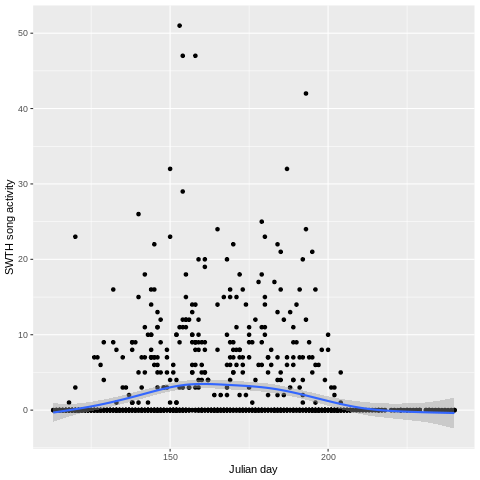

In [ ]:
%%R
ggplot(songs_per_recording.P, aes(JulianDay,SWTH))+
  xlab("Julian day")+
  ylab("SWTH song activity")+
  geom_point(aes(JulianDay,SWTH))+
  stat_smooth()

How well do the data used in the regression model meet the statistical assumptions of regression?

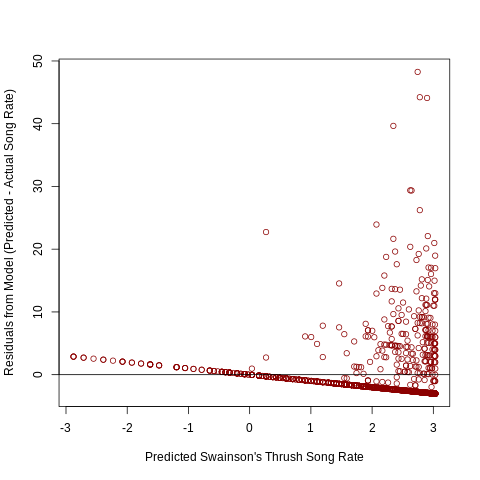

In [ ]:
%%R
res<-resid(mod) #model residuals
plot(fitted(mod), res,
     xlab="Predicted Swainson's Thrush Song Rate",
     ylab="Residuals from Model (Predicted - Actual Song Rate)",
     col="darkred") #predicted values on the x-axis, followed by residuals on the y-axis.
abline(0,0)

There is a lot of variance heterogeneity (bad!) since the residuals vary a lot more as the size of predicted values of song activity increase.

We can also look at a Q-Q (quantile-quantile) plot to assess how well the model's errors are normally distributed.

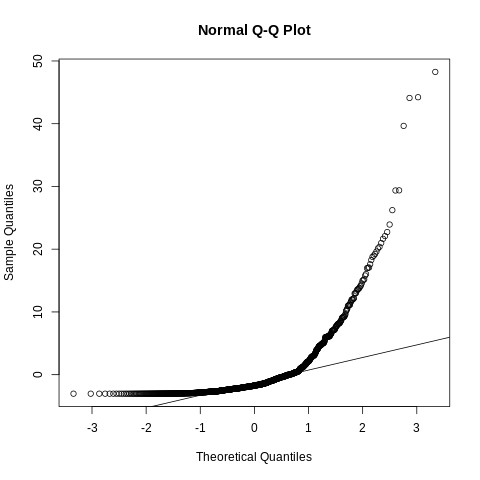

In [ ]:
%%R
qqnorm(res)#create a Q-Q plot for the residuals
qqline(res)#add a straight diagonal line to the plot

The model's residuals are not at all normally distributed. Larger predicted values’ residuals deviate from the Q-Q line (bad!).

On top of that, we know that there are multiple observations per site and those will be correlated with other observations from the same site.

We can try transforming the response variable to see if it improves the regression results, although data independence will still be an issue. There are four sites, with many repeated measurements over time at each site. Observations from the same site are expected to be more correlated with each other than with observations from other sites.

Here the dependent variable is square-root-transformed.


Call:
lm(formula = SWTH.sq ~ JDAY + JDAY2, data = songs_per_recording)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9087 -0.7900 -0.5269  0.0764  6.3162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.90254    0.04820  18.724   <2e-16 ***
JDAY         0.08859    0.03626   2.444   0.0147 *  
JDAY2       -0.31477    0.03297  -9.546   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.219 on 1198 degrees of freedom
Multiple R-squared:  0.07071,	Adjusted R-squared:  0.06915 
F-statistic: 45.58 on 2 and 1198 DF,  p-value: < 2.2e-16



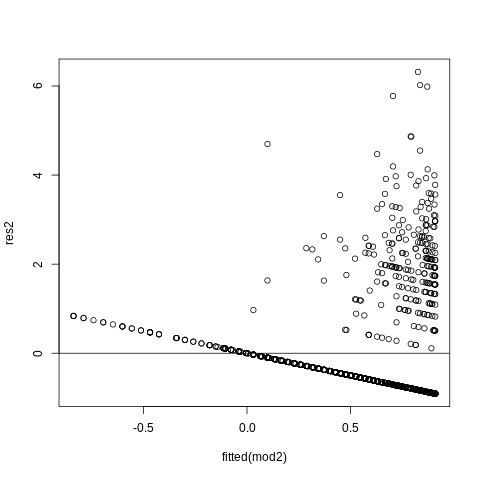

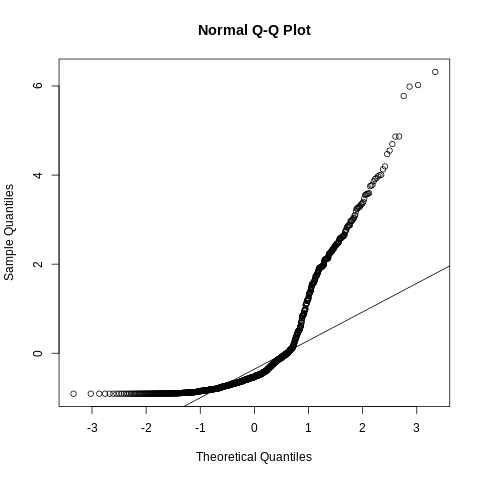

In [ ]:
%%R
songs_per_recording$SWTH.sq<-sqrt(songs_per_recording$SWTH)

mod2<-lm(SWTH.sq~JDAY+JDAY2, data=songs_per_recording)
print(summary(mod2))

res2<-resid(mod2)
plot(fitted(mod2), res2)
abline(0,0)

qqnorm(res2)
qqline(res2)

There is just a slight improvement in model fit according to the test statistics, but the residuals are still very heteroskedastic and non-normal. We could try log-transforming song rate as well. Note that a small positive number is added in case the observed song rate in a recording is zero.


Call:
lm(formula = SWTH.log ~ JDAY + JDAY2, data = songs_per_recording)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3438 -1.1723 -0.7830  0.0893  5.2765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.96732    0.06702 -14.433   <2e-16 ***
JDAY         0.12640    0.05041   2.507   0.0123 *  
JDAY2       -0.45965    0.04585 -10.025   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.695 on 1198 degrees of freedom
Multiple R-squared:  0.07741,	Adjusted R-squared:  0.07587 
F-statistic: 50.26 on 2 and 1198 DF,  p-value: < 2.2e-16



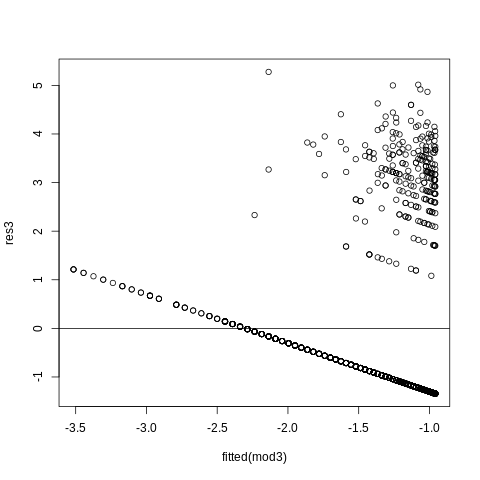

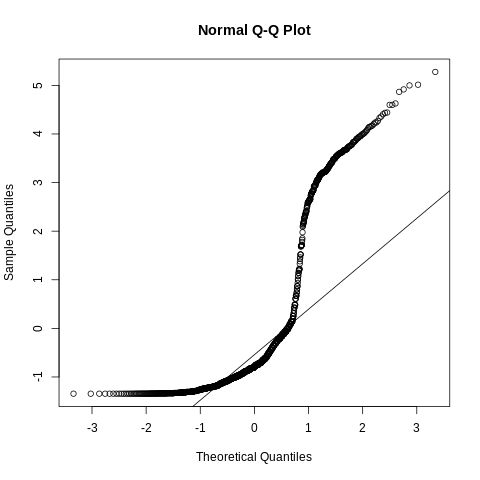

In [ ]:
%%R
songs_per_recording$SWTH.log<-log(songs_per_recording$SWTH+0.1)

mod3<-lm(SWTH.log~JDAY+JDAY2, data=songs_per_recording)
print(summary(mod3))

res3<-resid(mod3)
plot(fitted(mod3), res3)
abline(0,0)

qqnorm(res3)
qqline(res3)

Still little improvement. It may help to include time of day/night of a recording in the regression model, as that variable was an important one during data exploration, but song rate will probably need to be modelled as a more complex non-linear function of time of day/night. Perhaps a bimodel or circular function, which we'll learn more about when running generalized additive models.

You can see more examples of diagnostic plots for regressions in [Data&distributions.ipynb](https://docs.google.com/file/d/1apACLM5lb3-BQIRu8htg9iTLBSyFLT_Q/edit?ts=651accb9).

##Learning Outcome: How sharing code and writing reports in Google Colab notebooks enhances reproducibility of research.

Google Colab notebooks enable us to share well-documented code with other users interested in replicating or modifying our analyses. Sharing well-documented code enhances transparency, reproducibility of analysis, and trust in science. However, Google Colab notebooks go further by combining the code and software for analysis with automatic incorporation of analysis results into a report document. With notebooks, you don't need to repeatedly copy and paste analysis results into an external report document in a separate program (e.g., Microsoft Word), every time you tweak the code for analysis or rerun the analysis on additional data.

We will be learning about storing and sharing input, code, and output created outside of Google Colab in RStudio, in [a later lesson](https://colab.research.google.com/drive/1Ir_boBcXYrkZFX7dUWf-q-VHY_UO3dx2). In that lesson, we'll explore the use of R projects for organizing your inputs, code, and outputs in a logical way. You can then use either R scripts or RMarkdown documents (similar to Google Colab notebooks)to code your analyses. R projects and RMarkdown documents are still often used to share code among researchers.

The main advantage of Google Colab (and Jupyter) notebooks over RMarkdown documents is that you can run R and Python code in the same notebook and make the results from one analysis program easily available to other programs.

One potential disadvantage of Google Colab is that you need to be online to run analyses, and long-running analyses Google Colab may time out. In contrast, R projects and RMarkdown can usually be run offline, unless you need to be online to install packages or access data.

##Learning Outcome: Save Data Outside of Google Colab.

Last of all, ***save your data outside of Google Colab***! Once your Colab notebook is closed and your session ends, any output you've produced will be erased inside Colab. You can right-click individual files manually and download them to your laptop.

Or you can save individual or multiple R objects (data frames, constants, model objects, plots, tables, maps, GIS data like simple features objects and rasters) to a single RData file, then drag and drop that file to a folder in Google Drive, if Google Drive has already been mounted to Colab. *Make sure you write files to a drive folder where you can control sharing and other people's access*!

In [ ]:
%%R
ls()

 [1] "a"                          "a2"                        
 [3] "detectionMean"              "EarlyDetections_Basic"     
 [5] "EarlyDetections_Basic2"     "EarlyDetections_Tidy"      
 [7] "FirstBirdDetections_Basic"  "FirstBirdDetections_Basic2"
 [9] "FirstBirdDetections_Tidy"   "indivs_per_recording"      
[11] "meanJDAY"                   "mod"                       
[13] "mod2"                       "mod3"                      
[15] "NoMissingValues_Basic"      "NoMissingValues_Tidy"      
[17] "numNA"                      "numNA1"                    
[19] "numNA2"                     "numNA3"                    
[21] "numNA4"                     "numNA5"                    
[23] "numNA6"                     "objectNameHere"            
[25] "Ord1"                       "preds"                     
[27] "res"                        "res2"                      
[29] "res3"                       "sdJDAY"                    
[31] "songs_per_recording"        "songs_per_recording.

You can save multiple objects within a single RData file as follows, then manually download that one RData file or drag and drop it to a personal Google Drive folder.

In [ ]:
%%R
save(swth, swth_summ, songs_per_recording, indivs_per_recording, mod, mod2, mod3, file="Swainsons-Thrush-raw-processed-data.RData")
#manually download this file or drag and drop it in Google Drive